In [44]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2
import glob
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import joblib
model_path = '/content/drive/MyDrive/Colab Notebooks/cell_segmentation_and_classifier/Classifier.joblib'
model_classify = joblib.load(model_path)
model_segmentation = load_model('/content/drive/MyDrive/Colab Notebooks/cell_segmentation_and_classifier/Segmentation_data_and_labels/Segmentation_Data_files/unet-non-aug.h5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:

def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (320, 240))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [81]:
def visualize_results(image, mask,ctype):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image.squeeze())
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Predicted Mask and Type : {ctype}")
    def postprocess_mask(mask):
      mask = (mask > 0.5).astype(np.uint8)
      return mask
    plt.imshow(postprocess_mask(mask).squeeze(), cmap='gray')
    plt.axis('off')

    plt.show()

In [82]:
def classify(predictions):
  if np.argmax(predictions) ==0:
    return "Eosinophil"
  elif np.argmax(predictions) ==1:
    return "Lymphocyte"
  elif np.argmax(predictions) ==2:
    return "Monocyte"
  elif np.argmax(predictions )==3:
    return "Neutrophil"

1/1 [==============================] - 0s 41ms/step
Monocyte


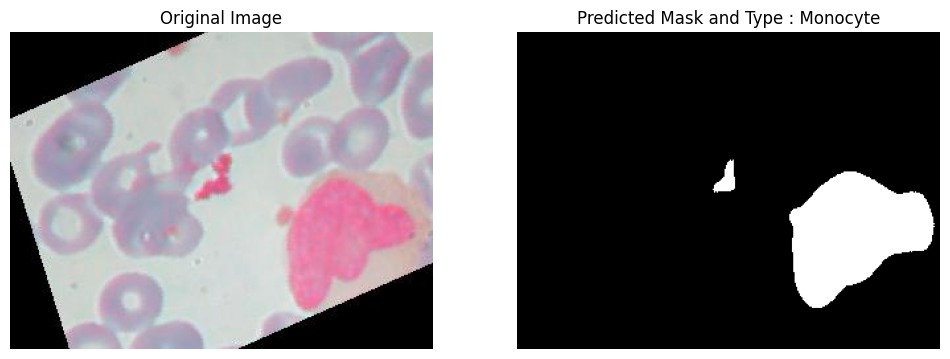

In [87]:
sample_image_path = '/content/drive/MyDrive/Colab Notebooks/cell_segmentation_and_classifier/TRAIN/MONOCYTE/_0_1276.jpeg'
sample_image = load_and_preprocess_image(sample_image_path)

predictions = model_segmentation.predict(sample_image)
predicted_mask = predictions[0]
image = Image.open(sample_image_path)

image = image.resize((256, 256))
image = np.array(image) / 255.0
image = image.reshape((1, 256, 256, 3))
classify_ = classify(model_classify.predict(image))
print(classify_)

visualize_results(sample_image[0], predicted_mask, classify_)